Παλιάκης Ιωάννης
03114877


<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [3]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [22]:
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [10]:
# import football.gml from local file using nx.read_gml
football= nx.read_gml('football.gml')
dolphins=nx.read_gml('dolphins.gml')
lesmis = nx.read_gml('lesmis.gml')


In [11]:
print(nx.info(football))
print(nx.info(dolphins))
print(nx.info(lesmis))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609
Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290
Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [16]:
#check if football is directed
nx.is_directed(football)
# nx.draw_circular(lesmis, node_size=20, node_color='green', with_labels=False)

False

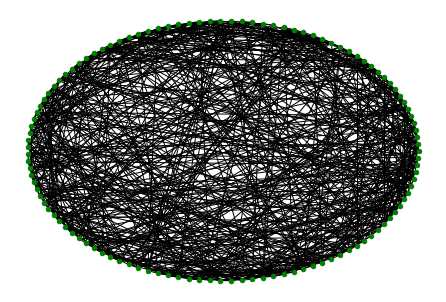

In [19]:
#visualize football
nx.draw_circular(football, node_size=20, node_color='green', with_labels=False)

In [ ]:
#import lesmis.gml

In [17]:
#check if lesmis is directed
nx.is_directed(lesmis)

False

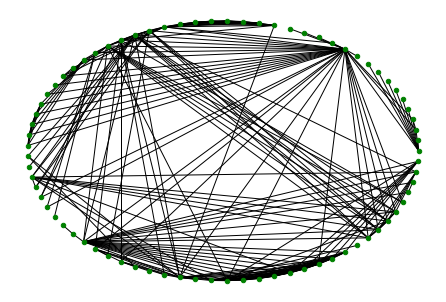

In [20]:
nx.draw_circular(lesmis, node_size=20, node_color='green', with_labels=False)

In [ ]:
#import dolphins.gml

In [18]:
#check if dolphins is directed
nx.is_directed(dolphins)

False

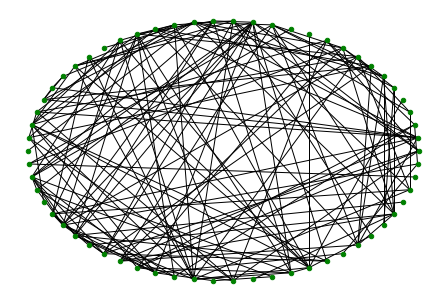

In [21]:
nx.draw_circular(dolphins, node_size=20, node_color='green', with_labels=False)

Μετατρέπω όλες τις φυσικές τοπολογίες έτσι ώστε τα ονόματα των κόμβων να είναι αύξοντες ακέραιοι για να μπορώ να τις χειριστώ πιο εύκολα

In [125]:
football_int=nx.convert_node_labels_to_integers(football,first_label=0)
lesmis_int=nx.convert_node_labels_to_integers(lesmis,first_label=0)
dolphins_int=nx.convert_node_labels_to_integers(dolphins,first_label=0)

Στα παρακάτω ερωτήματα (μπορείτε αν θέλετε να το εξακριβώσετε) χρησιμοποιώ συναρτήσεις που είχα κατασκευάσει στο πρώτο εργαστήριο . Δεν παραθέτω επεξηγήσεις καθώς αυτά ανήκουν στο πρώτο εργαστήριο

In [66]:
def find_degree(G):
    l  = G.degree
    lst = [None] * len(l)
    for i in range(len(l)):
        lst[i] = l[i]
    return lst

In [111]:
football_degree= find_degree(football_int)
lesmis_degree=find_degree(lesmis_int)
dolphins_degree=find_degree(dolphins_int)

In [112]:
print(football_degree)

[12, 12, 12, 12, 11, 12, 12, 12, 11, 11, 10, 10, 10, 11, 10, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 10, 11, 9, 11, 11, 11, 11, 10, 11, 11, 8, 11, 11, 11, 11, 10, 7, 11, 11, 11, 11, 11, 11, 11, 9, 11, 10, 12, 10, 11, 10, 10, 10, 8, 11, 11, 11, 9, 11, 11, 11, 12, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 12, 11, 9, 11, 11, 10, 10, 10, 10, 8, 11, 10, 11, 10, 10, 10, 12, 10, 11, 10, 10, 11, 11, 11, 10, 10, 11]


In [113]:
print(lesmis_degree)

[10, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 36, 2, 1, 1, 1, 9, 7, 7, 7, 7, 7, 7, 15, 11, 16, 11, 17, 4, 8, 2, 4, 1, 2, 6, 6, 6, 6, 6, 3, 1, 11, 3, 3, 2, 1, 1, 2, 22, 7, 2, 7, 2, 1, 4, 19, 2, 11, 15, 11, 9, 11, 13, 12, 13, 12, 10, 1, 10, 10, 10, 9, 3, 2, 2, 7, 7]


In [114]:
print(dolphins_degree)

[6, 8, 4, 3, 1, 4, 6, 5, 6, 7, 5, 1, 1, 8, 12, 7, 6, 9, 7, 4, 9, 6, 1, 3, 6, 3, 3, 5, 5, 9, 5, 1, 3, 10, 5, 1, 7, 11, 8, 2, 8, 5, 6, 7, 4, 11, 2, 6, 1, 2, 7, 10, 4, 2, 7, 2, 2, 9, 1, 5, 1, 3]


In [115]:
def meancal(lst):
    return sum(lst)/len(lst)

In [149]:
football_mean_degree = meancal(football_degree)
print(football_mean_degree)

10.660869565217391


In [150]:
lesmis_mean_degree = meancal(lesmis_degree)
print(lesmis_mean_degree)

6.597402597402597


In [151]:
dolphins_mean_degree = meancal(dolphins_degree)
print(dolphins_mean_degree)

5.129032258064516


In [120]:
def compute_cc(G):
    total=[]
    for m in range(len(G)):
        sum1,d=0,{}
        x=list(G.adj[m])
        k=[list(G.adj[i]) for i in x]
        for i in x:
            d[i] = True
        for i in k:
            for l in i:
                if l in d:
                    sum1+=1
        if len(k)>1:
            final = sum1/(len(k)*(len(k)-1))
        else:
            final = float("Nan")
        total.append(final)
    return total

In [122]:
print("CC for football {}".format(compute_cc(football_int)))

CC for football [0.3484848484848485, 0.4393939393939394, 0.3787878787878788, 0.3333333333333333, 0.41818181818181815, 0.36363636363636365, 0.3181818181818182, 0.3939393939393939, 0.4727272727272727, 0.4727272727272727, 0.4444444444444444, 0.3111111111111111, 0.3333333333333333, 0.38181818181818183, 0.37777777777777777, 0.3484848484848485, 0.41818181818181815, 0.34545454545454546, 0.4, 0.43636363636363634, 0.36363636363636365, 0.45454545454545453, 0.509090909090909, 0.45454545454545453, 0.2222222222222222, 0.509090909090909, 0.3333333333333333, 0.36363636363636365, 0.3333333333333333, 0.4909090909090909, 0.4727272727272727, 0.38181818181818183, 0.38181818181818183, 0.6444444444444445, 0.38181818181818183, 0.43636363636363634, 0.14285714285714285, 0.5272727272727272, 0.3090909090909091, 0.41818181818181815, 0.34545454545454546, 0.5333333333333333, 0.14285714285714285, 0.2909090909090909, 0.36363636363636365, 0.5272727272727272, 0.5272727272727272, 0.38181818181818183, 0.36363636363636365

In [123]:
print("CC for lesmis {}".format(compute_cc(lesmis_int)))

CC for football [0.06666666666666667, nan, 1.0, 1.0, nan, nan, nan, nan, nan, nan, nan, 0.12063492063492064, 1.0, nan, nan, nan, 0.6111111111111112, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3142857142857143, 0.4909090909090909, 0.4083333333333333, 0.38181818181818183, 0.3235294117647059, 0.3333333333333333, 0.6428571428571429, 1.0, 0.6666666666666666, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, nan, 0.45454545454545453, 1.0, 1.0, 1.0, nan, nan, 0.0, 0.354978354978355, 0.47619047619047616, 0.0, 0.42857142857142855, 0.0, nan, 1.0, 0.3333333333333333, 1.0, 0.6909090909090909, 0.6095238095238096, 0.9272727272727272, 1.0, 0.9272727272727272, 0.7564102564102564, 0.8636363636363636, 0.7692307692307693, 0.8636363636363636, 0.9333333333333333, nan, 0.8, 0.8, 0.7111111111111111, 0.8333333333333334, 1.0, 1.0, 1.0, 0.9047619047619048, 1.0]


In [124]:
print("CC for dolphins {}".format(compute_cc(dolphins_int)))

CC for dolphins [0.3333333333333333, 0.14285714285714285, 0.16666666666666666, 0.3333333333333333, nan, 0.5, 0.5333333333333333, 0.2, 0.26666666666666666, 0.5238095238095238, 0.4, nan, nan, 0.5, 0.25757575757575757, 0.23809523809523808, 0.6, 0.2222222222222222, 0.5238095238095238, 0.5, 0.1388888888888889, 0.5333333333333333, nan, 0.3333333333333333, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.4, 0.3, 0.25, 0.3, nan, 0.3333333333333333, 0.3333333333333333, 0.3, nan, 0.047619047619047616, 0.23636363636363636, 0.2857142857142857, 0.0, 0.25, 0.6, 0.3333333333333333, 0.23809523809523808, 0.16666666666666666, 0.3090909090909091, 0.0, 0.4, nan, 0.0, 0.23809523809523808, 0.24444444444444444, 0.3333333333333333, 0.0, 0.38095238095238093, 0.0, 0.0, 0.3611111111111111, nan, 0.3, nan, 0.0]


In [126]:
football_clust_coef = compute_cc(football_int)
lesmis_clust_coef = compute_cc(lesmis_int)
dolphins_clust_coef = compute_cc(dolphins_int)

football_mean =sum(football_clust_coef)/len(football_clust_coef)
lesmis_mean =sum(lesmis_clust_coef)/len(lesmis_clust_coef)
dolphins_mean =sum(dolphins_clust_coef)/len(dolphins_clust_coef)

In [127]:
print("The mean for football {}".format(football_mean))
print("The mean for lesmis {}".format(lesmis_mean))
print("The mean for dolphins {}".format(dolphins_mean))

The mean for football 0.40321601104209814
The mean for lesmis nan
The mean for dolphins nan


Παρατηρώ ότι αυτός ο τρόπος υπολογισμού μου βγάζει nan επειδή υπάρχει τουλάχιστον 1 nan στις παραπάνω τοπολογίες , όμως αυτό δεν μου δίνει καμία πληροφορία , οπότε αυτό που θα κάνω είναι να αφαιρέσω όλες τις nan τιμές

In [131]:
import math

In [140]:
lesmis_clust_coef = [x for x in lesmis_clust_coef if math.isnan(x)==False]
dolphins_clust_coef = [x for x in lesmis_clust_coef if math.isnan(x)==False]

In [141]:
lesmis_mean =sum(lesmis_clust_coef)/len(lesmis_clust_coef)
dolphins_mean =sum(dolphins_clust_coef)/len(dolphins_clust_coef)

print("The mean for lesmis {}".format(lesmis_mean))
print("The mean for dolphins {}".format(dolphins_mean))

The mean for lesmis 0.7355254957460837
The mean for dolphins 0.7355254957460837


In [142]:
def calculate_betweenness_centrality(G):
    betweenness_centrality = nx.betweenness_centrality(G)
    return list(betweenness_centrality.values())

In [154]:
football_betweenness_centrality=calculate_betweenness_centrality(football_int)
lesmis_betweenness_centrality=calculate_betweenness_centrality(lesmis_int)
dolphins_betweenness_centrality=calculate_betweenness_centrality(dolphins_int)

In [155]:
print(football_betweenness_centrality)
print(lesmis_betweenness_centrality)
print(dolphins_betweenness_centrality)

[0.03248994918389482, 0.017621112680095283, 0.013122497053431072, 0.023070098856845606, 0.010663869449409077, 0.010660982082613544, 0.01968128436895882, 0.014563035979091633, 0.005008648931669307, 0.01183115085985048, 0.006907991485590174, 0.011400348520391542, 0.010144133783987277, 0.017291363429954684, 0.007074447857815538, 0.020895265847707085, 0.022213447427560148, 0.01660199660390932, 0.008492946116024448, 0.009759312735771708, 0.02304632173060802, 0.022126807176414888, 0.006732525804006757, 0.0075893356814986665, 0.02070022463158684, 0.01778327242869339, 0.01700336998667973, 0.010660261265228411, 0.01817205827359323, 0.009028716823683692, 0.015086641056354317, 0.00841756267007742, 0.014876854560096126, 0.007354298482007655, 0.008025924976628357, 0.015475551922823365, 0.013206024770572684, 0.009130695528918065, 0.02518680197086883, 0.010703577458606346, 0.013982681992917627, 0.006438559060854571, 0.00778950469459186, 0.01359544491329856, 0.014372451528538928, 0.011443177305595333,

In [156]:
football_mean_betweenness_centrality = sum(football_betweenness_centrality)/len(football_betweenness_centrality)
lesmis_mean_betweenness_centrality = sum(lesmis_betweenness_centrality)/len(lesmis_betweenness_centrality)
dolphins_mean_betweenness_centrality = sum(dolphins_betweenness_centrality)/len(dolphins_betweenness_centrality)

In [158]:
print("Mean degree centrality football: {} "
      .format(football_mean_betweenness_centrality))
print("Mean degree centrality lesmis: {} "
      .format(lesmis_mean_betweenness_centrality))
print("Mean degree centrality dolphins: {} "
      .format(dolphins_mean_betweenness_centrality))

Mean degree centrality football: 0.013346563793091811 
Mean degree centrality lesmis: 0.021881977671451367 
Mean degree centrality dolphins: 0.03928256654327515 


Για να κάνω την σύγκριση κάνω έναν γρήγορο υπολογισμό όλων των παραπάνων μετρικών για τις σύνθετες τοπολογίες

In [152]:
REG_degree= find_degree(REG)
RGER_degree=find_degree(RGER)
RGG_degree=find_degree(RGG)
SF_degree=find_degree(SF)
SW_degree=find_degree(SW)


REG_mean_degree = meancal(REG_degree)
RGER_mean_degree = meancal(RGER_degree)
RGG_mean_degree = meancal(RGG_degree)
SF_mean_degree = meancal(SF_degree)
SW_mean_degree = meancal(SW_degree)


REG_clust_coef = compute_cc(REG)
RGER_clust_coef = compute_cc(RGER)
RGG_clust_coef = compute_cc(RGG)
SF_clust_coef = compute_cc(SF)
SW_clust_coef = compute_cc(SW)


REG_mean =sum(REG_clust_coef)/len(REG_clust_coef)
RGER_mean =sum(RGER_clust_coef)/len(RGER_clust_coef)
RGG_mean =sum(RGG_clust_coef)/len(RGG_clust_coef)
SF_mean =sum(SF_clust_coef)/len(SF_clust_coef)
SW_mean =sum(SW_clust_coef)/len(SW_clust_coef)


REG_betweenness_centrality = calculate_betweenness_centrality(REG)
RGER_betweenness_centrality = calculate_betweenness_centrality(RGER)
RGG_betweenness_centrality = calculate_betweenness_centrality(RGG)
SF_betweenness_centrality = calculate_betweenness_centrality(SF)
SW_betweenness_centrality = calculate_betweenness_centrality(SW)


REG_mean_betweenness_centrality = sum(REG_betweenness_centrality)/len(REG_betweenness_centrality)
RGER_mean_betweenness_centrality = sum(RGER_betweenness_centrality)/len(RGER_betweenness_centrality)
RGG_mean_betweenness_centrality = sum(RGG_betweenness_centrality)/len(RGG_betweenness_centrality)
SF_mean_betwenness_centrality = sum(SF_betweenness_centrality)/len(SF_betweenness_centrality)
SW_mean_betweenness_centrality = sum(SW_betweenness_centrality)/len(SW_betweenness_centrality)

In [166]:
def distribution(sub,col):
    fig, ax = plt.subplots(nrows=1, ncols=col,figsize=(20,5))
    for ind,a in enumerate(ax):
        a.hist(sub[ind][0],density=False, bins=len(REG))
        a.set_ylabel("Number")
        a.set_xlabel("Degree")
        a.set_title(sub[ind][1])
    plt.tight_layout()

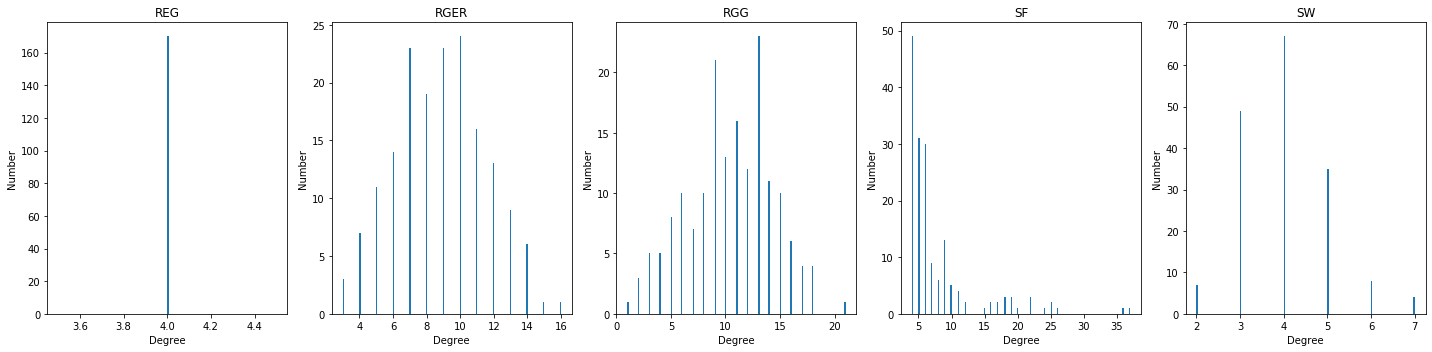

In [167]:
sub=[[REG_degree,"REG"],[RGER_degree,"RGER"],[RGG_degree,"RGG"],[SF_degree,"SF"],[SW_degree,"SW"],
     [football_degree,"football"],[lesmis_degree,"lesmis"],[dolphins_degree,"dolphins"]]  
distribution(sub,5)

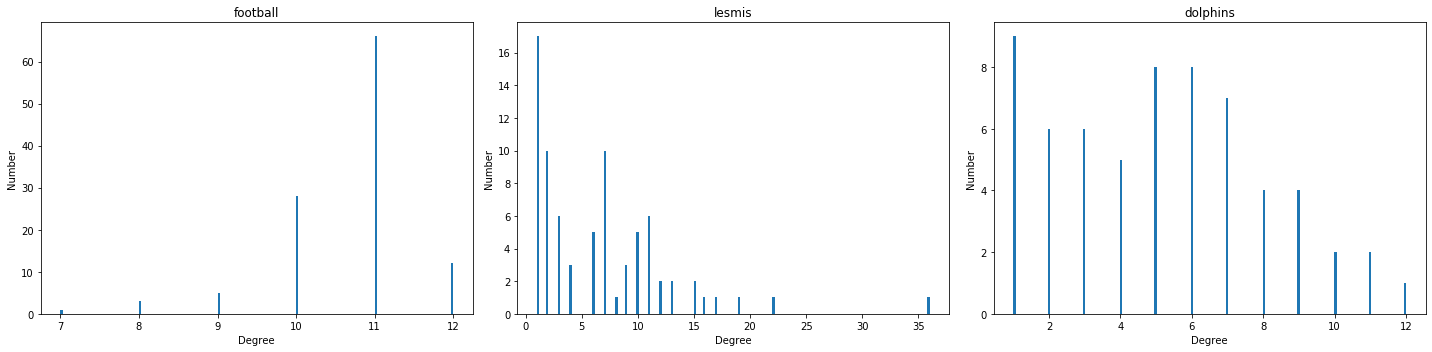

In [168]:
sub=[[football_degree,"football"],[lesmis_degree,"lesmis"],[dolphins_degree,"dolphins"]]  
distribution(sub,3)

Παρατηρώ ότι το football μοιάζει αρκετά με small world γράφο , οι άθλιοι μοιάζουν με scale free γραο , και τα dolphins με random graph , πιο πολύ με erdos renyi γράφο. Εκεί θα τα ταξινομούσα , και έτσι θα τα μελετούσαμε εαν είχαμε την ανάγκη

In [172]:
def plot_cumulative(lst,names,col):
    fig, ax = plt.subplots(nrows=1, ncols=col,figsize=(20,5))
    for i in range(len(lst)):
        temp = lst[i].copy()
        temp.sort()
        ax[i].plot(temp,[i for i in range(1,len(temp)+1)])
        ax[i].set_title(names[i])

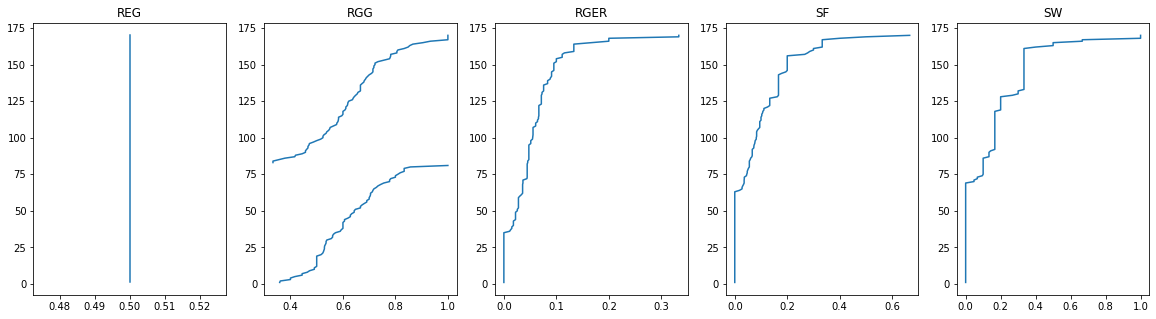

In [182]:
sub=[REG_clust_coef,RGG_clust_coef,RGER_clust_coef,SF_clust_coef,SW_clust_coef]
names0 = ["REG","RGG","RGER","SF","SW"]
plot_cumulative(sub,names0,5)

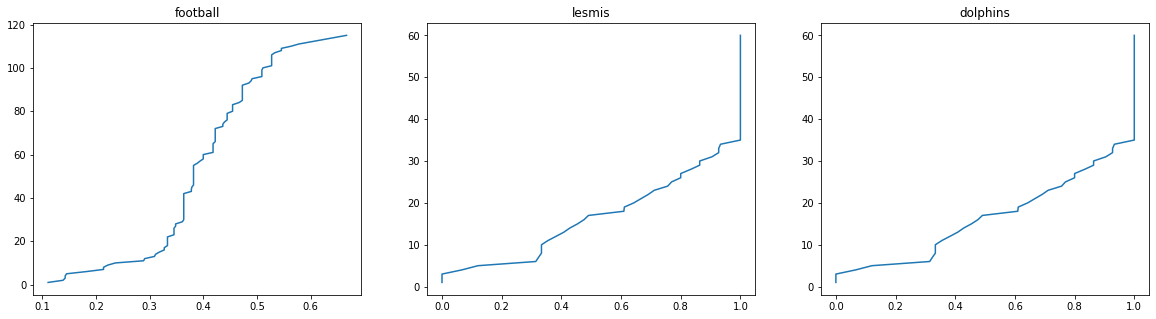

In [183]:
sub=[football_clust_coef,lesmis_clust_coef,dolphins_clust_coef]
names1 = ["football","lesmis","dolphins"]
plot_cumulative(sub,names1,3)


<BarContainer object of 8 artists>

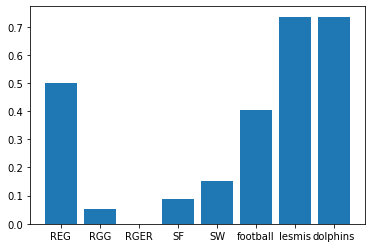

In [184]:
plt.bar(names0+names1,[REG_mean,RGER_mean,RGG_mean,SF_mean,SW_mean,football_mean,lesmis_mean,dolphins_mean])

<BarContainer object of 8 artists>

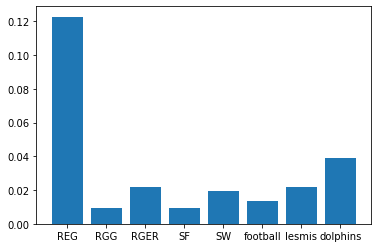

In [185]:
plt.bar(names0+names1,[REG_mean_betweenness_centrality,
                    RGER_mean_betweenness_centrality,
                    RGG_mean_betweenness_centrality,
                    SF_mean_betwenness_centrality,
                    SW_mean_betweenness_centrality,
                    football_mean_betweenness_centrality,
                    lesmis_mean_betweenness_centrality,
                    dolphins_mean_betweenness_centrality])

REG
RGER
RGG
SF
SW

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση <a style=text-decoration:none href='https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/community/quality.html'>modularity</a>.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [195]:
#insert colors for nodes
from matplotlib import colors as mcolors
import itertools
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

Ο girvan newman δεν θα σταματήσει μέχρι να βγάλει όλες τις ακμές και έτσι να έχω μία κοινότητα για κάθε κόμβο , κάτι που δεν έχει κανένα νόημα .Έτσι θα βρω το μεγαλύτερο modularity και θα κρατήσω μόνο αυτήν την διαχώριση.

In [226]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities

#nx.algorithms.community.quality.modularity to measure modularity
#def comd_GN(G,k):
# f=[]
# k = 50
def comd_GN(G,k):
    graph_community_gn=nx.algorithms.community.centrality.girvan_newman(G)
    fl = list(graph_community_gn)
    final_list = []
    for i in range(k):
        final_list.append(nx.algorithms.community.quality.modularity(G,list(fl[i])))
    index =final_list.index(max(final_list))
    return[index,final_list[index],fl[i]]

In [229]:
football_girvan_newman=comd_GN(football_int,50)
lesmis_girvan_newman=comd_GN(lesmis_int,50)
REG_girvan_newman=comd_GN(REG,50)
RGER_girvan_newman=comd_GN(RGER,50)
RGG_girvan_newman=comd_GN(RGG,50)
SF_girvan_newman=comd_GN(SF,50)
SW_girvan_newman=comd_GN(SW,50)

In [230]:
dolphins_girvan_newman=comd_GN(dolphins_int,50)

Φτιάχνω μία συνάρτηση που από την μορφή των set που ήταν η διαμέριση σε κοινότητες το κάνει σε λίστα από λίστες που είναι αρκετά πιο εύχρηστη μορφή .

In [244]:
def sets_to_lists(st,ind):
    tmt =[]
    for i in (list(st[ind])):
        tmt.append(list(i))
    return tmt

<class 'set'>


In [245]:
football_girvan_newman_community = sets_to_lists(football_girvan_newman,2)
lesmis_girvan_newman_community = sets_to_lists(lesmis_girvan_newman,2)
dolphins_girvan_newman_community = sets_to_lists(dolphins_girvan_newman,2)
REG_girvan_newman_community = sets_to_lists(REG_girvan_newman,2)
RGER_girvan_newman_community = sets_to_lists(RGER_girvan_newman,2)
RGG_girvan_newman_community = sets_to_lists(RGG_girvan_newman,2)
SF_girvan_newman_community = sets_to_lists(SF_girvan_newman,2)
SW_girvan_newman_community = sets_to_lists(SW_girvan_newman,2)

Η συνάρτηση η color_maker παίρνει μία λίστα που είναι μία διαμέριση σε κοινότητες και φτιάχνεις μία λίστα από χρώματα έτσι ώστε κόμβοι σε ίδια κοινότητα να έχουν το ίδιο χρώμα , χρησιμοποιώντας αυτήν την συνάρτηση βρίσκω τα χρώματα και απεικονίζω

In [252]:
def color_maker(lst,cols):
    ln = sum([len(x) for x in lst])
    final_cols = ['red']*ln
    for ind,i in enumerate(lst):
        for j in i:
            final_cols [j] = cols[ind] 
    return final_cols

In [257]:
def draw_with_colors(G,lst,cols):
    fgncolors = color_maker(lst,cols)
    nx.draw(G,node_color = fgncolors)

Παρακάνω απεικονίζω για τον αλγόριθμο girvan_newman την διαμέριση σε κοινότητες

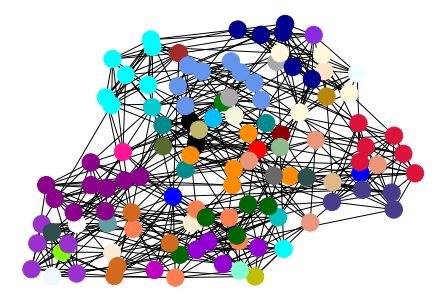

In [266]:
draw_with_colors(football_int,football_girvan_newman_community,colors)

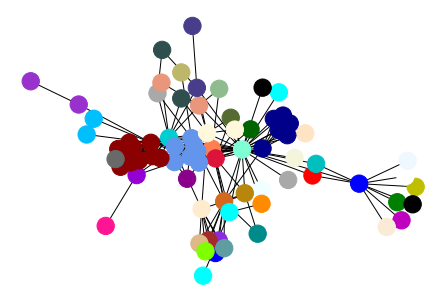

In [267]:
draw_with_colors(lesmis_int,lesmis_girvan_newman_community,colors)

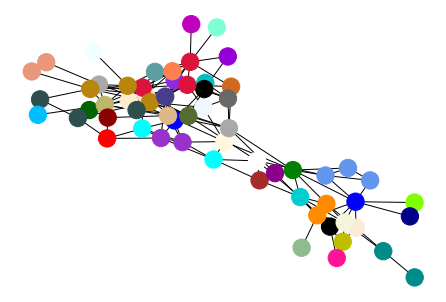

In [268]:
draw_with_colors(dolphins_int,dolphins_girvan_newman_community,colors)

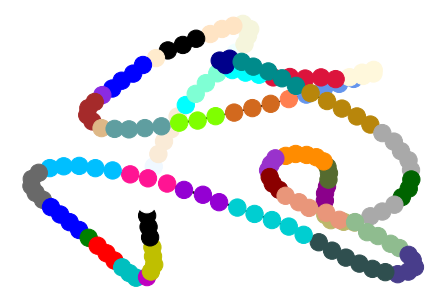

In [269]:
draw_with_colors(REG,REG_girvan_newman_community,colors)

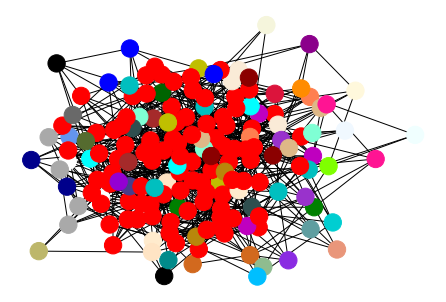

In [270]:
draw_with_colors(RGER,RGER_girvan_newman_community,colors)

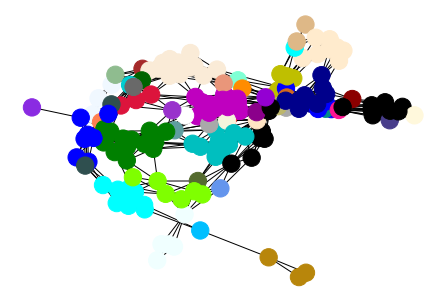

In [271]:
draw_with_colors(RGG,RGG_girvan_newman_community,colors)

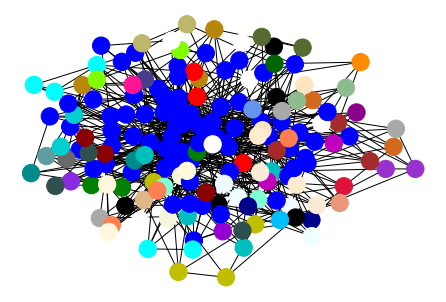

In [272]:
draw_with_colors(SF,SF_girvan_newman_community,colors)

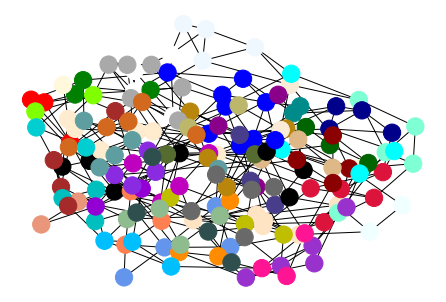

In [273]:
draw_with_colors(SW,SW_girvan_newman_community,colors)

Το community detection και σε αυτόν αλλά και στους παρακάτω αλγορίρθμους ήταν αυτό που περίμενα. Για τα συνθετικά γραφήματα βλέπω ότι το regular οι γείτονες αποτελούν κοινότητες.Στον τυχαίο erdos-renyi παρατηρώ ότι υπάρχουν πολλές τυχαίες κοινότητες με μία επικρατούσα. Στον γεωμετρικό όπως είναι ανάμενόμενο έχω communities ανά γεωγραφικές περιοχές . Στον scale free σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμο δηλαδή οι κοινότητες είναι περίπου όσοι οι δυνατοί κόμβοι . Ενώ στο small world σπάνε οι κοινότητες του πλέγματος και δημιουργούνται καινούργιες πιο πολλές

Χρησιμοποιώ τον αλγόριθμο του scikit learn κάνοντας τις απαραίτητες αλλαγές για να εξυπηρετήσει γραφήματα

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [341]:
import sklearn
import networkx as nx
import matplotlib.pyplot as plt

def spectral_clustering(G,k):
    adj_matrix = nx.to_numpy_matrix(G) #Converts graph to an adj matrix with adj_matrix[i][j] represents weight between node i,j.
    node_list = list(G.nodes()) #returns a list of nodes with index mapping with the a 

    clusters = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=0,n_clusters=k).fit_predict(adj_matrix)
    temporary = [[] for i in range(k)]
    ln = len(G.nodes())
    sm=0;
    for i in range(ln):
        sm+=1
        temporary[clusters[i]].append(i)
    return temporary

Φτιάχνω μία συνάρτηση που να ελέγχει το καλύτερο modularity σε spectral σε ένας εύρος 1-κ για δοσμένο κ

In [392]:
def testing_modularity(G,k):
    tmt = []
    for i in range(1,k+1):
        tmt.append(nx.algorithms.community.quality.modularity(G,spectral_clustering(G,i)))
    index = tmt.index(max(tmt))
    return [index,spectral_clustering(G,index+1),tmt[index]]

In [360]:
football_spectral = testing_modularity(football_int,50)
lesmis_spectral = testing_modularity(lesmis_int,50)
dolphins_spectral = testing_modularity(dolphins_int,50)
REG_spectral = testing_modularity(REG,50)
RGER_spectral = testing_modularity(RGER,50)
RGG_spectral = testing_modularity(RGG,50)
SF_spectral = testing_modularity(SF,50)
SW_spectral = testing_modularity(SW,50)


Με βάση αυτή τη συνάρτηση βρίσκω τα καλύτερα modularities και κάνω τα γραφήματα χρησιμοποιώντας τις συναρτήσεις που έχω ήδη φτιάξει

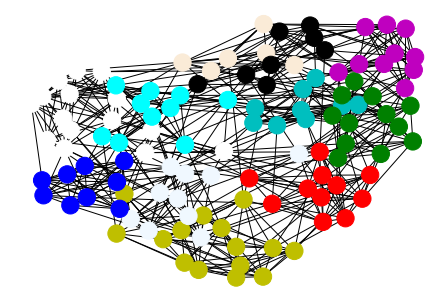

In [362]:
draw_with_colors(football_int,football_spectral[1],colors)

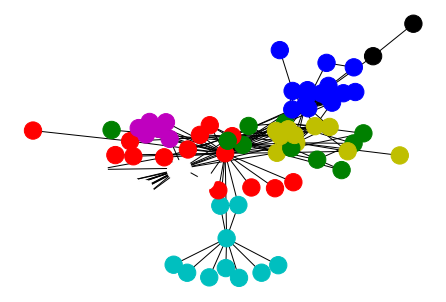

In [363]:
draw_with_colors(lesmis_int,lesmis_spectral[1],colors)

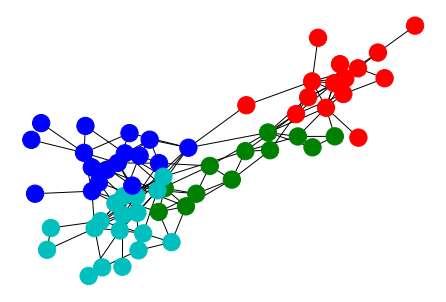

In [364]:
draw_with_colors(dolphins_int,dolphins_spectral[1],colors)

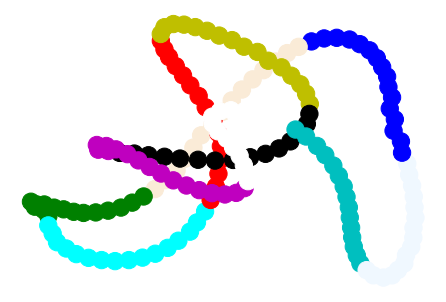

In [365]:
draw_with_colors(REG,REG_spectral[1],colors)

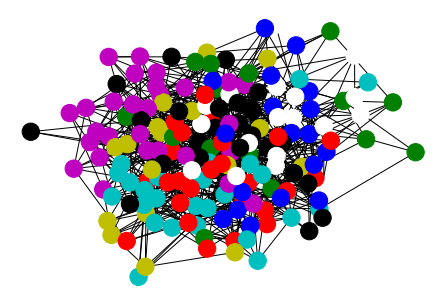

In [367]:
draw_with_colors(RGER,RGER_spectral[1],colors)

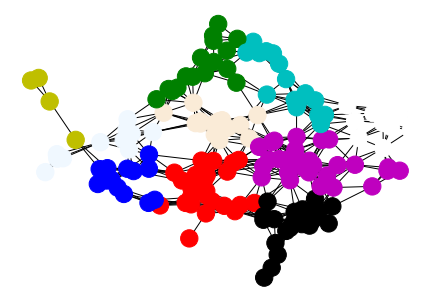

In [368]:
draw_with_colors(RGG,RGG_spectral[1],colors)

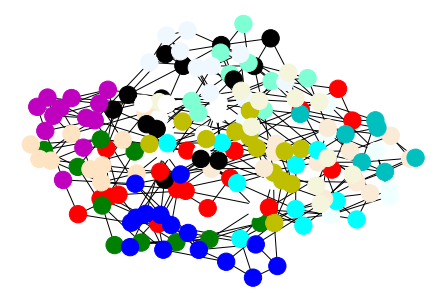

In [369]:
draw_with_colors(SW,SW_spectral[1],colors)

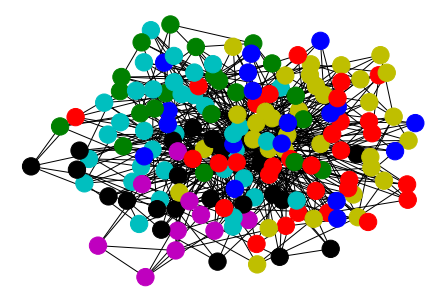

In [370]:
draw_with_colors(SF,SF_spectral[1],colors)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [371]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

#def comd_MM(G):
 
def comd_MM(G,k):
    graph_community_gn=nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    fl = list(graph_community_gn)
    final_list = []
    for i in range(k):
        final_list.append(nx.algorithms.community.quality.modularity(G,list(fl[i])))
    index =final_list.index(max(final_list))
    return[index,final_list[index],fl[i]]

In [372]:
football_greedy=comd_GN(football_int,50)
lesmis_greedy=comd_GN(lesmis_int,50)
dolphins_greedy=comd_GN(dolphins_int,50)
REG_greedy=comd_GN(REG,50)
RGER_greedy=comd_GN(RGER,50)
RGG_greedy=comd_GN(RGG,50)
SF_greedy=comd_GN(SF,50)
SW_greedy=comd_GN(SW,50)

In [374]:
football_greedy_community = sets_to_lists(football_greedy,2)
lesmis_greedy_community = sets_to_lists(lesmis_greedy,2)
dolphins_greedy_community = sets_to_lists(dolphins_greedy,2)
REG_greedy_community = sets_to_lists(REG_greedy,2)
RGER_greedy_community = sets_to_lists(RGER_greedy,2)
RGG_greedy_community = sets_to_lists(RGG_greedy,2)
SW_greedy_community = sets_to_lists(SW_greedy,2)
SF_greedy_community = sets_to_lists(SF_greedy,2)

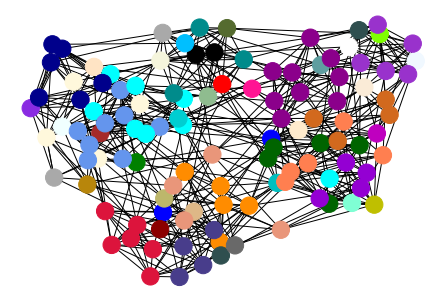

In [375]:
draw_with_colors(football_int,football_greedy_community,colors)

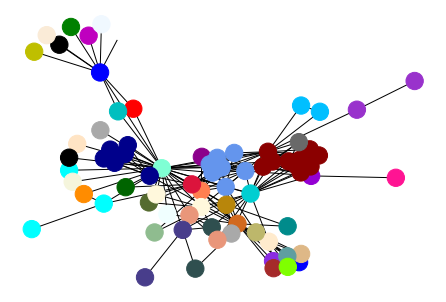

In [376]:
draw_with_colors(lesmis_int,lesmis_greedy_community,colors)

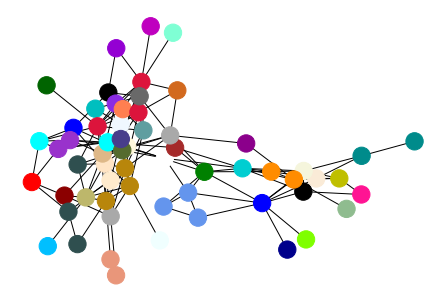

In [378]:
draw_with_colors(dolphins_int,dolphins_greedy_community,colors)

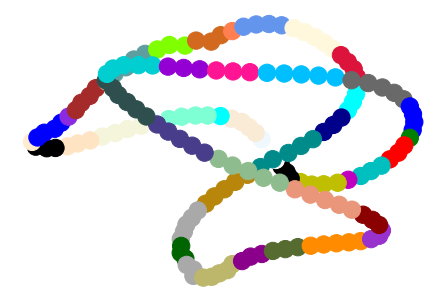

In [379]:
draw_with_colors(REG,REG_greedy_community,colors)

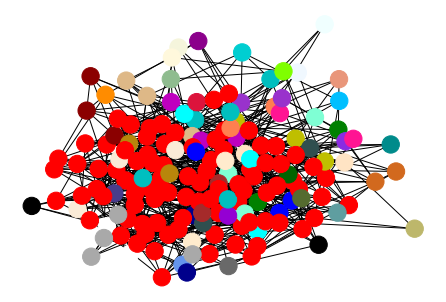

In [380]:
draw_with_colors(RGER,RGER_greedy_community,colors)

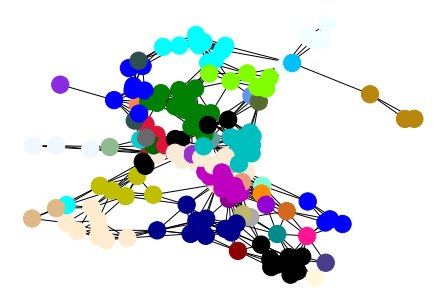

In [381]:
draw_with_colors(RGG,RGG_greedy_community,colors)

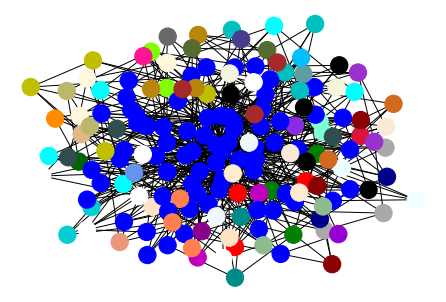

In [382]:
draw_with_colors(SF,SF_greedy_community,colors)

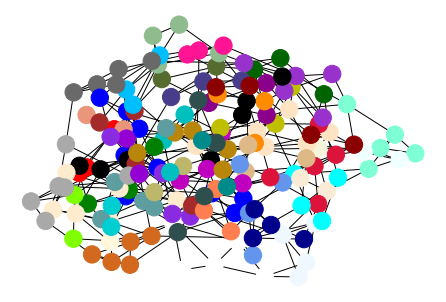

In [383]:
draw_with_colors(SW,SW_greedy_community,colors)

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

Παραθέτω εδώ σημείωση ότι για λόγους οργάνωσης οι απεικονίσεις γίναν στους επιμέρους αλγορίθμους η καθεμία και όχι όλες μαζί

In [386]:
namesfinal = ['foo_gi_ne','les_gi_ne','do_gi_ne','foo_sp','les_sp','do_sp','foo_max','les_max','do_max']

<BarContainer object of 9 artists>

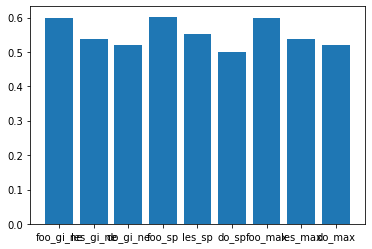

In [390]:
plt.bar(namesfinal,[football_girvan_newman[1],
                    lesmis_girvan_newman[1],
                    dolphins_girvan_newman[1],
                       football_spectral[2],
                      lesmis_spectral[2],
                       dolphins_spectral[2],
                       football_greedy[1],
                       lesmis_greedy[1],
                       dolphins_greedy[1]
                      ]
                    )

Παραπάνω έχω για κάθε αλγόριθμο με την σειρά το football το lesmis και το dolphins , παρατηρώ ότι δεν διαφέρουν πολύ τα modularities όσο αλλάζω αλγόριθμο 